<a href="https://colab.research.google.com/github/sudhir5595/Image-Classification-System/blob/main/detectImageClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory("//gdrive/My Drive/ML_image/CNNtrainCrop",
target_size = (64, 64),
batch_size = 32,content
class_mode = 'categorical')



FileNotFoundError: ignored

In [ ]:
test_set = test_datagen.flow_from_directory("/content/gdrive/My Drive/ML_image/CNNtestCrop",
target_size = (64, 64),
batch_size = 32,
class_mode = 'categorical')


Found 301 images belonging to 3 classes.


In [ ]:
classifier.fit_generator(training_set,
steps_per_epoch = 150,
epochs = 15,
validation_data = test_set,
validation_steps = 150)

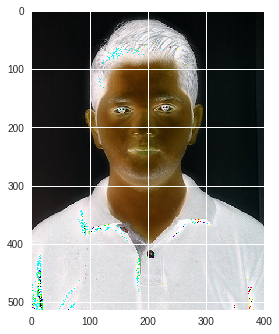

Collar tshirt
[[0.25063884 0.33059475 0.41876644]]


In [ ]:
# Part 3 - Making new predictions
import skimage
import numpy as np
from keras.preprocessing import image
#test_image = image.load_img('/content/gdrive/My Drive/ML_image/Test_set/Collar_tshirt/Coll_T15.jpg', target_size = (64, 64))
#test_image = image.load_img('/content/gdrive/My Drive/ML_image/Test_set/V_neck/V1-NeckT10.jpg', target_size = (64, 64))
test_image = image.load_img('/content/gdrive/My Drive/ML_image/Check/abc1.jpg', target_size = (64, 64))

#from skimage import io 

#img = io.imread('/content/gdrive/My Drive/ML_image/Check/abc3.jpg',flatten=True)

#test_image = skimage.transform.resize(img,(64,64,3))



from skimage import filters
#sobel = filters.sobel(test_image)

import matplotlib.pyplot as plt 
import cv2
im = cv2.imread('/content/gdrive/My Drive/ML_image/Check/abc1.jpg')
first_image = np.array(im, dtype='float')
pixels = first_image
plt.imshow(pixels, cmap='gray')
plt.show()




test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
#training_set.class_indices
if result[0][2] > (result[0][0] and result[0][1]):
  prediction = 'Collar tshirt'
elif result[0][1] >(result[0][2] and result[0][1]):
  prediction = 'V neck'
else:
  prediction = "round neck"

  
print(prediction)
print(result)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(result[0][2])


In [ ]:
train_datagen


In [ ]:
classifier.save("cnnmode.h5")

In [ ]:
from keras.models import load_model 
classifier.save('/content/gdrive/My Drive/ML_image/Check/my_model.h5')